In [12]:
import numpy as np
from os import path
import xarray as xr

# from aicsimageio import AICSImage
# from aicspylibczi import CziFile
from matplotlib import pyplot as plt
from itertools import product

plt.rcParams["font.family"] = "sans-serif"
plt.style.use("../paper_style.mplstyle")
figwidth = 3.4

import pandas as pd
from skimage.io import imread
import yaml
from scipy.fft import dctn
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from basicpy.metrics import fourier_L0_norm


def save_and_copy_fig(fig, name):
    fig.savefig("../figs/" + name + ".pdf")
    !mkdir -p ~/myworks/papers/2305_BaSiCPy/fig3/
    !cp ../figs/{name}.pdf ~/myworks/papers/2305_BaSiCPy/fig3/

In [13]:
estimated_parameters_df = pd.read_csv(
    "wo_flatfield_estimated_parameters_df_with_autotune.csv", index_col=0
)

In [14]:
estimated_parameters_df

,true_flatfield_id,intensity,ave_count,n_images,blob_dist_key,rep,image_index,fitting_mode,smoothness_flatfield,time_gpu,time_cpu,deviation,entropy,fourier_L0_norm,autotune_cost
0,0,10,30,10,biased,0,0,ladmap,0.100000,12.788740,NaN,0.039185,2.035007,0.329701,11.926041
1,0,10,30,10,biased,0,0,ladmap,0.261016,1.134672,NaN,0.033143,2.041676,0.150249,6.549148
2,0,10,30,10,biased,0,0,ladmap,0.681292,0.936035,NaN,0.023936,2.054167,0.017933,2.592150
3,0,10,30,10,biased,0,0,ladmap,1.778279,0.949724,NaN,0.014436,2.068040,0.000249,2.075512
4,0,10,30,10,biased,0,0,ladmap,4.641589,1.035547,NaN,0.009749,2.081444,0.000000,2.081444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,3,1000,100,1000,unbiased,4,719,approximate,0.681292,2.088787,NaN,0.004025,7.205264,0.000934,7.233284
10076,3,1000,100,1000,unbiased,4,719,approximate,1.778279,2.317800,NaN,0.003350,7.205574,0.000000,7.205574
10077,3,1000,100,1000,unbiased,4,719,approximate,4.641589,2.083310,NaN,0.004422,7.206906,0.000000,7.206906
10078,3,1000,100,1000,unbiased,4,719,approximate,12.115277,2.316262,NaN,0.012073,7.210934,0.000000,7.210934


In [15]:
param_sets = [
    {"intensity": 100, "ave_count": 30, "blob_dist_key": "biased"},
    {"intensity": 1000, "ave_count": 100, "blob_dist_key": "unbiased"},
]


def format_str(v):
    if isinstance(v, str):
        return f"'{v}'"
    else:
        return v


for p in param_sets:
    _df = estimated_parameters_df.query(
        " and ".join([f"{k} == {format_str(v)}" for k, v in p.items()])
    )
    display(_df.head())
    print(_df["image_index"].unique()[[0, 1, 2]])
    for i in _df["image_index"].unique()[[0, 1, 2]]:
        !cp /Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/{i}.npy ./wo_darkfield_imagess/

,true_flatfield_id,intensity,ave_count,n_images,blob_dist_key,rep,image_index,fitting_mode,smoothness_flatfield,time_gpu,time_cpu,deviation,entropy,fourier_L0_norm,autotune_cost
840,0,100,30,10,biased,0,60,ladmap,0.100000,1.691189,NaN,0.022673,3.995808,0.276588,12.293442
841,0,100,30,10,biased,0,60,ladmap,0.261016,0.821440,NaN,0.019966,4.002427,0.093337,6.802551
842,0,100,30,10,biased,0,60,ladmap,0.681292,0.629423,NaN,0.014997,4.010529,0.013014,4.400940
843,0,100,30,10,biased,0,60,ladmap,1.778279,0.808065,NaN,0.010211,4.018193,0.000374,4.029401
844,0,100,30,10,biased,0,60,ladmap,4.641589,0.609951,NaN,0.007293,4.033655,0.000000,4.033655


[60 61 62]


,true_flatfield_id,intensity,ave_count,n_images,blob_dist_key,rep,image_index,fitting_mode,smoothness_flatfield,time_gpu,time_cpu,deviation,entropy,fourier_L0_norm,autotune_cost
2170,0,1000,100,10,unbiased,0,155,ladmap,0.100000,2.436040,0.067086,0.061279,7.058469,0.288481,15.712890
2171,0,1000,100,10,unbiased,0,155,ladmap,0.261016,0.852592,0.053382,0.056326,7.064915,0.085554,9.631540
2172,0,1000,100,10,unbiased,0,155,ladmap,0.681292,0.654380,0.063617,0.047587,7.070879,0.014757,7.513594
2173,0,1000,100,10,unbiased,0,155,ladmap,1.778279,0.838849,0.045504,0.034258,7.081802,0.000872,7.107954
2174,0,1000,100,10,unbiased,0,155,ladmap,4.641589,0.818795,0.042120,0.024511,7.098500,0.000062,7.100368


[155 156 157]


In [16]:
name_map = {
    "intensity": "Int.",
    "ave_count": "Count",
    "blob_dist_key": "Dist.",
    "n_images": "# images",
}

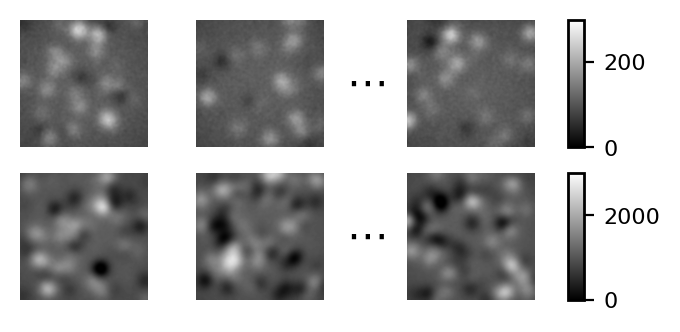

In [17]:
fig, axes = plt.subplots(
    2, 5, width_ratios=(1, 1, 0.1, 1, 0.1), figsize=(figwidth, figwidth / 2)
)
for p, _axes in zip(param_sets, axes):
    _df = estimated_parameters_df.query(
        " and ".join([f"{k} == {format_str(v)}" for k, v in p.items()])
    )
    i = _df["image_index"].unique()[0]
    im = np.load(f"./wo_darkfield_imagess/{i}.npy")
    for _im, _ax in zip(im, [_axes[0], _axes[1], _axes[3]]):
        mappable = _ax.imshow(_im, cmap="gray", vmin=0.0, vmax=p["intensity"] * 3.0)
    fig.colorbar(mappable, cax=_axes[4])
for ax in axes[:, :-1].ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
for ax in axes[:, 2].ravel():
    ax.axis("off")
    ax.text(
        0.5,
        0.5,
        "$\cdots$",
        transform=ax.transAxes,
        ha="center",
        va="center",
        fontsize=15,
    )
fig.subplots_adjust(left=0.05, right=0.9, top=0.875, bottom=0.05)
save_and_copy_fig(fig, "fig3a_synthesized_data_examples")

In [18]:
flatfiled_profiles = np.load("flatfield_profiles.npy")

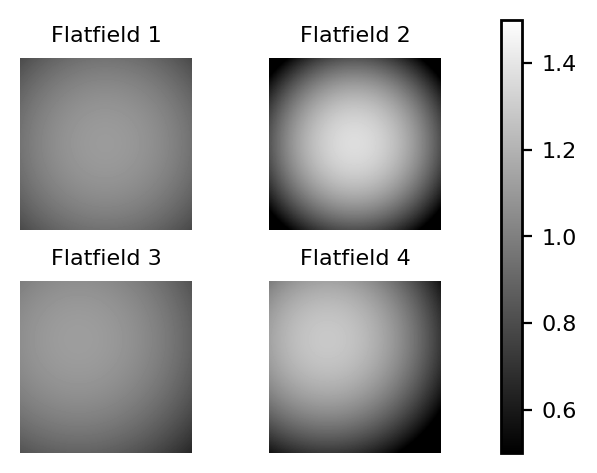

In [19]:
fig, axes = plt.subplots(
    2,
    2,
    width_ratios=(1, 1),
    figsize=(figwidth, figwidth * 0.75),
    subplot_kw={"aspect": "equal"},
    gridspec_kw={"hspace": 0.3, "wspace": 0.1},
)

for jj, (ax, flatfiled_profile) in enumerate(zip(axes.ravel(), flatfiled_profiles)):
    mappable = ax.imshow(flatfiled_profile, cmap="gray", vmin=0.5, vmax=1.5)
    ax.set_title(f"Flatfield {jj+1}")

for ax in axes[:, :].ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
fig.colorbar(mappable, ax=axes.ravel().tolist())


fig.subplots_adjust(left=0.05, right=0.75, top=0.875, bottom=0.1)
save_and_copy_fig(fig, "figS_flatfield_profiles")

In [20]:
estimated_parameters_df.keys()

Index(['true_flatfield_id', 'intensity', 'ave_count', 'n_images',
       'blob_dist_key', 'rep', 'image_index', 'fitting_mode',
       'smoothness_flatfield', 'time_gpu', 'time_cpu', 'deviation', 'entropy',
       'fourier_L0_norm', 'autotune_cost'],
      dtype='object')

In [21]:
image_properties = ["intensity", "ave_count", "blob_dist_key", "n_images"]
fitting_parameters = [
    "fitting_mode",
    "rep",
    "smoothness_flatfield",
    "true_flatfield_id",
]

estimated_parameters_xr = xr.Dataset.from_dataframe(
    estimated_parameters_df.query("fitting_mode=='ladmap'").set_index(
        image_properties + fitting_parameters
    )
)
estimated_parameters_xr

<xarray.Dataset>
Dimensions:               (intensity: 3, ave_count: 2, blob_dist_key: 2,
                           n_images: 3, fitting_mode: 1, rep: 5,
                           smoothness_flatfield: 7, true_flatfield_id: 4)
Coordinates:
  * intensity             (intensity) int64 10 100 1000
  * ave_count             (ave_count) int64 30 100
  * blob_dist_key         (blob_dist_key) object 'biased' 'unbiased'
  * n_images              (n_images) int64 10 100 1000
  * fitting_mode          (fitting_mode) object 'ladmap'
  * rep                   (rep) int64 0 1 2 3 4
  * smoothness_flatfield  (smoothness_flatfield) float64 0.1 0.261 ... 31.62
  * true_flatfield_id     (true_flatfield_id) int64 0 1 2 3
Data variables:
    image_index           (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) int64 ...
    time_gpu              (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    time_cpu              (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    deviation             (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    entropy               (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    fourier_L0_norm       (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    autotune_cost         (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...

In [22]:
figwidth

3.4

In [23]:
sample_keys = ["rep", "true_flatfield_id", "blob_dist_key"]
x_key = "smoothness_flatfield"
col_keys = ["intensity", "ave_count"]
row_keys = list(
    set(image_properties + fitting_parameters)
    - set(sample_keys)
    - set([x_key])
    - set(col_keys)
)
print(row_keys)
ncols = np.prod([len(estimated_parameters_xr.coords[k]) for k in col_keys])
nrows = np.prod([len(estimated_parameters_xr.coords[k]) for k in row_keys])
print(ncols, nrows)

['n_images', 'fitting_mode']
6 3


Cost with different smoothness_flatfield and autotune costs

In [24]:
estimated_parameters_xr2 = estimated_parameters_xr.copy()
estimated_parameters_xr2["entropy"] = estimated_parameters_xr2[
    "entropy"
] - estimated_parameters_xr2["entropy"].min(dim="smoothness_flatfield")
estimated_parameters_xr2["autotune_cost"] = estimated_parameters_xr2[
    "autotune_cost"
] - estimated_parameters_xr2["autotune_cost"].min(dim="smoothness_flatfield")

In [25]:
xvals

NameError: name 'xvals' is not defined

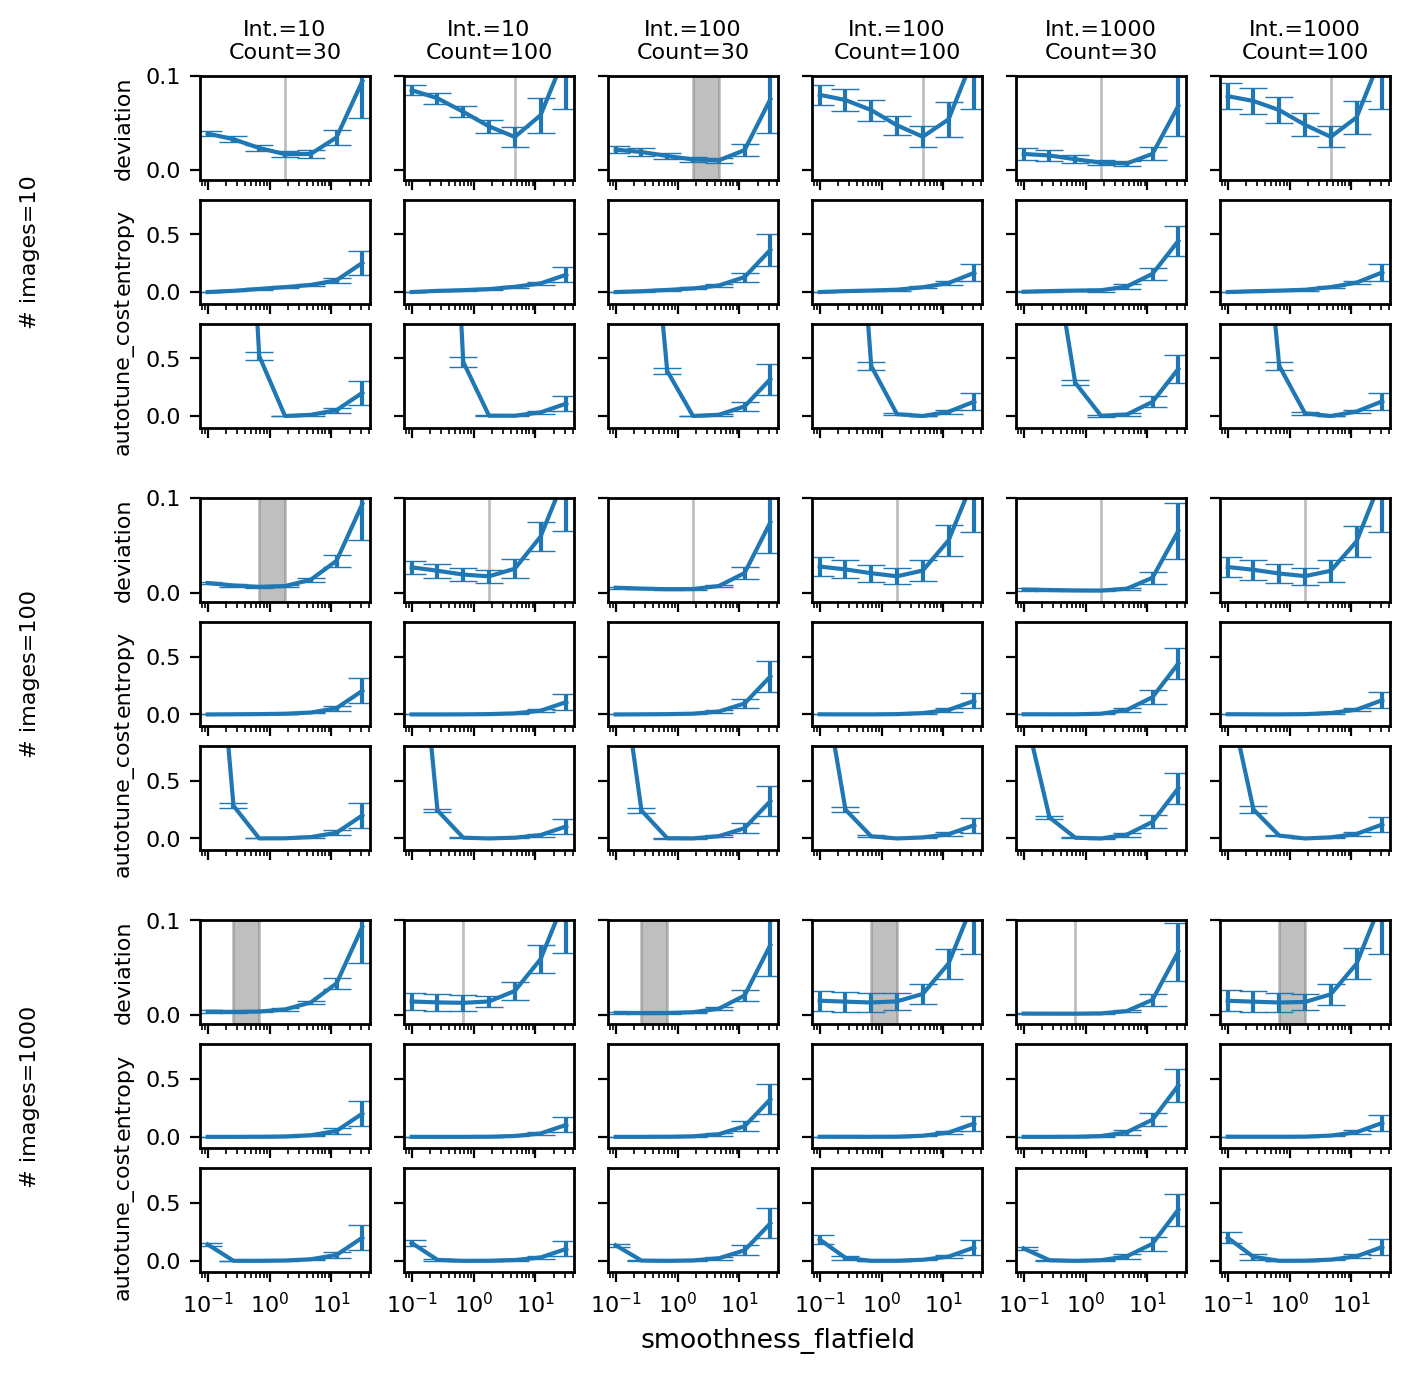

In [26]:
fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(figwidth * 2, figwidth * 4 / ncols * nrows),
    # gridspec_kw={"hspace": 1.5, "wspace": 1.0},
    dpi=100,
)
val_keys = ["deviation", "entropy", "autotune_cost"]
row_coords = list(
    product(*[estimated_parameters_xr.coords[c].to_numpy() for c in row_keys])
)
col_coords = list(
    product(*[estimated_parameters_xr.coords[c].to_numpy() for c in col_keys])
)
for jj, (row_coord, row_axes) in enumerate(zip(row_coords, axes)):
    ds = estimated_parameters_xr2.sel(**dict(zip(row_keys, row_coord)))
    minmaxes = [(ds[k].min(), ds[k].max()) for k in val_keys]
    for kk, (col_coord, ax) in enumerate(zip(col_coords, row_axes)):
        ds = estimated_parameters_xr2.sel(
            **dict(zip(row_keys, row_coord)), **dict(zip(col_keys, col_coord))
        )
        ds = ds.sortby(x_key)
        xs = ds.coords[x_key].to_numpy()
        mean_dims = set(ds.dims) - set([x_key])

        divider = make_axes_locatable(ax)
        ax3 = ax
        ax2 = divider.append_axes("top", size="100%", pad=0.1)
        ax1 = divider.append_axes("top", size="100%", pad=0.1)
        ax1.set_ylim([-0.01, 0.1])
        ax2.set_ylim([-0.1, 0.8])
        ax3.set_ylim([-0.1, 0.8])
        for k, minmax, _ax in zip(val_keys, minmaxes, [ax1, ax2, ax3]):
            ys = ds[k].mean(dim=mean_dims).to_numpy()
            yerrs = ds[k].std(dim=mean_dims).to_numpy()
            _ax.errorbar(xs, ys, yerr=yerrs, label=k)
            # _ax.set_ylim(minmax)
            _ax.set_xscale("log")
            if kk != 0:
                _ax.set_yticklabels([])
            else:
                _ax.set_ylabel(k)
            if jj != nrows - 1:
                _ax.set_xticklabels([])
        if jj == 0:
            title = "\n".join(
                [f"{name_map[k]}={v}" for k, v in zip(col_keys, col_coord)]
            )
            ax1.set_title(title)
        else:
            ax1.set_xticklabels([])
            ax2.set_xticklabels([])
        if kk == 0:
            title = "\n".join(
                [
                    f"{name_map[k]}={v}"
                    for k, v in zip(row_keys, row_coord)
                    if k != "fitting_mode"
                ]
            )
            ax2.text(
                -1.0,
                0.5,
                title,
                transform=ax2.transAxes,
                ha="center",
                va="center",
                rotation=90,
            )

        sample_coords = list(product(*[ds.coords[c].to_numpy() for c in sample_keys]))
        xvals = []
        for c in sample_coords:
            _ds = ds.sel(**dict(zip(sample_keys, c)))
            min_index = (
                _ds.autotune_cost.argmin().item()
            )  # Using .item() to extract the scalar value
            # Get the corresponding value of smoothness_flatfield
            min_xval = _ds.coords[x_key][min_index].item()
            xvals.append(min_xval)
        ax1.fill_betweenx([-0.01, 0.1], xvals[0], xvals[1], color="gray", alpha=0.5)

fig.supxlabel("smoothness_flatfield")
fig.subplots_adjust(left=0.075, right=0.95, top=0.95, bottom=0.07)
# fig.supylabel("Deviation")
save_and_copy_fig(fig, "figS_synthesized_data_all")